# dHybridR Example Notebook

#### Here we provide an example of what a typical analysis notebook will look like when computing velocity space signatures and generating MLA algo data will look like

In [57]:
import lib.loadfunctions as lf 
import lib.analysisfunctions as af
import lib.plotfunctions as pf
import lib.savefunctions as svf
import lib.sanityfunctions as sanf
import lib.fieldtransformfunctions as ftf

import os
import math
import numpy as np

In [131]:
#block to reload modules. Call this block after editing libraries
import importlib
importlib.reload(lf)
importlib.reload(af)
importlib.reload(pf)
importlib.reload(svf)
importlib.reload(sanf)
importlib.reload(ftf)

<module 'lib.fieldtransformfunctions' from '/Users/collbrown/Documents/OneDrive - University of Iowa/Research/DHybridR/analysistools/dHybridRAnalysis/lib/fieldtransformfunctions.py'>

### Load data

In [132]:
#variables related to loading
path = "M03/"
path_fields = "M03/"
path_particles = "M03/Output/Raw/Sp01/raw_sp01_{:08d}.h5"
numframe = 0


In [27]:
#load fields
dfields = lf.field_loader(path=path_fields,num=numframe)

#load particle data
#dparticles = lf.readParticlesPosandVelocityOnly(path_particles, numframe)

#load flow data
dflow = lf.flow_loader(path='run0/',num=1000)

Select from the following possible movie numbers: 
[1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200] 1000


### Plot fields, particle dist function, and flow
#### used as a sanity check on the data

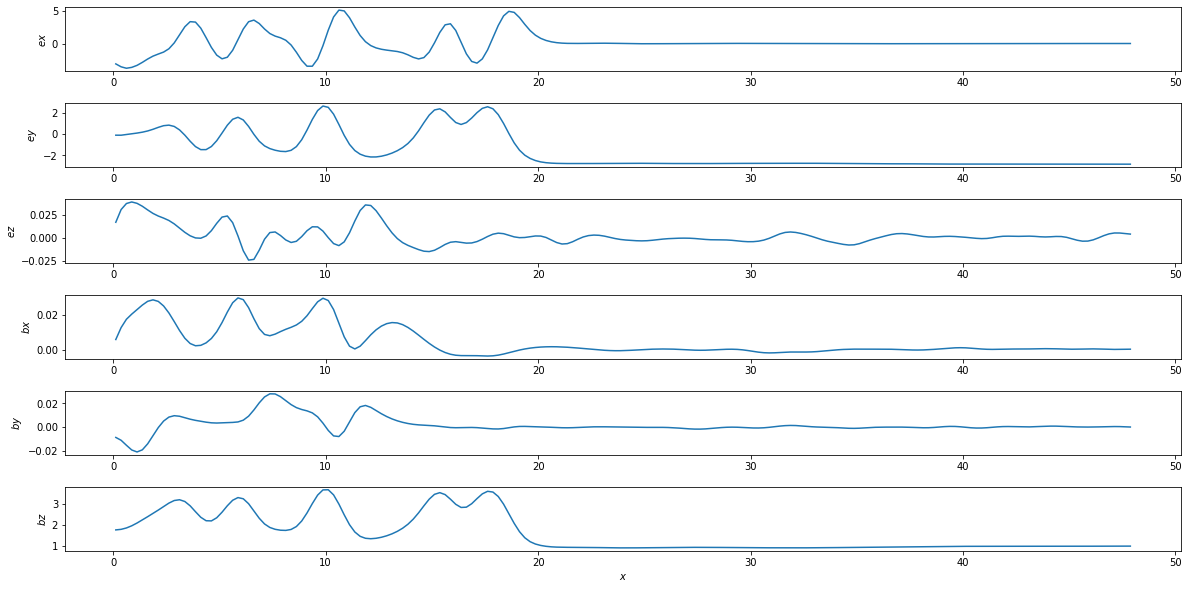

In [133]:
pf.plot_all_fields(dfields, axis='_xx', xxindex = 0, yyindex = 0, zzindex = 0)

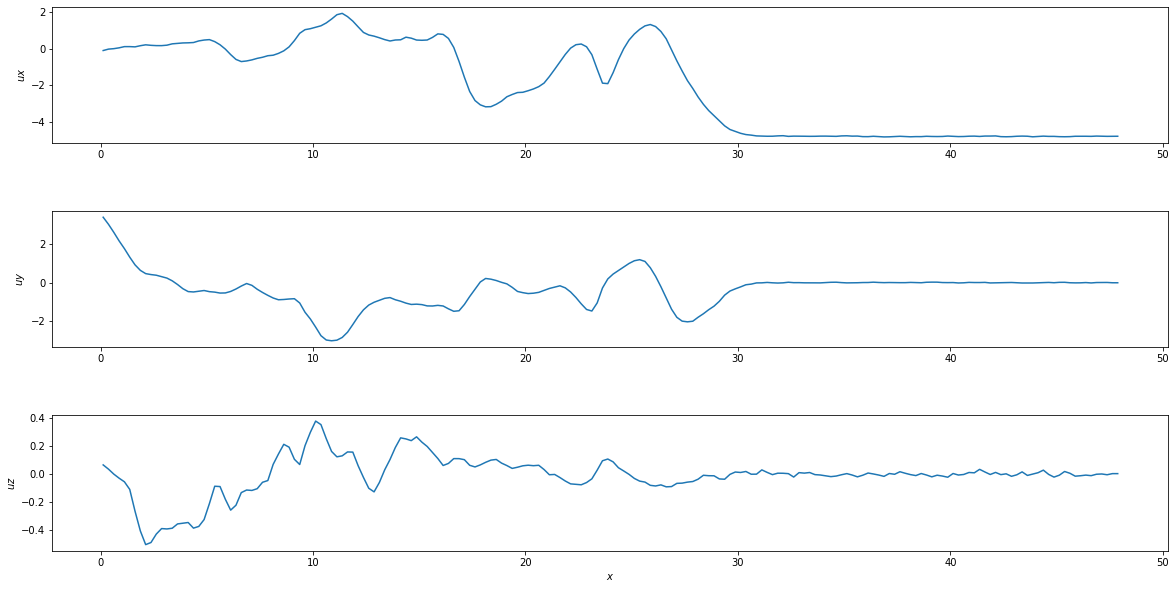

In [29]:
pf.plot_all_flow(dflow, axis='_xx', xxindex = 0, yyindex = 0, zzindex = 0)

In [30]:
pf.plot_1d_dist(dparticles, 'p1', 10., dfields['ex_xx'][0], dfields['ex_xx'][-1],dfields['ex_yy'][0], dfields['ex_yy'][-1])

NameError: name 'dparticles' is not defined

### Determine where shock is
#### want to figure out the x range of the shock and assign correct metadata values

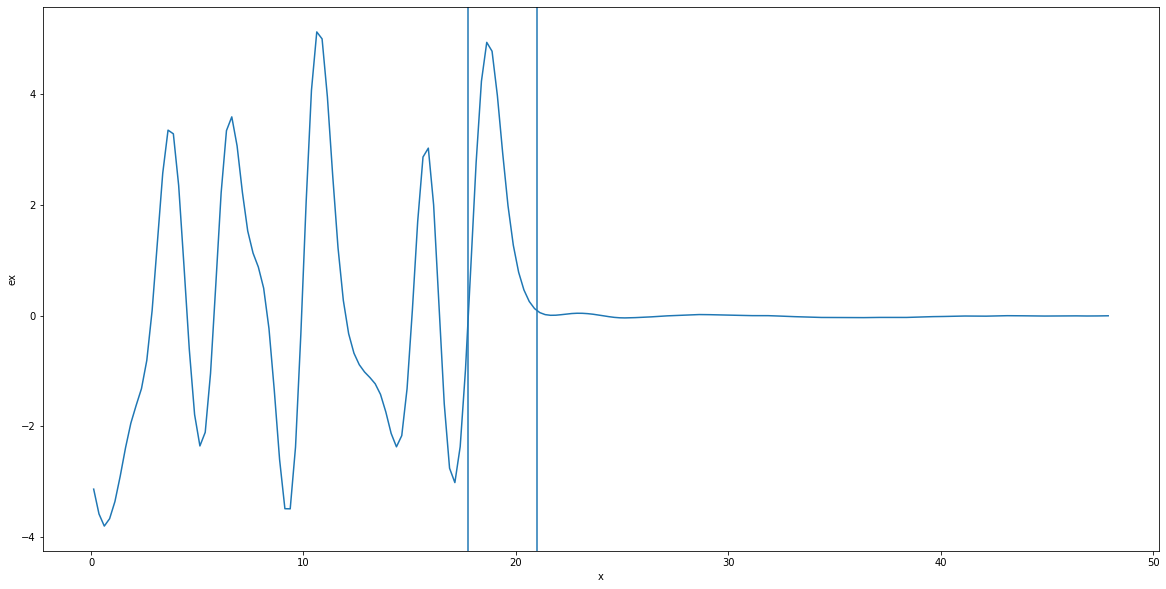

In [31]:
#Use this block to determine start and end val
startval = 17.75 #lower bound for metadata = 1 (di)
endval = 21. #upper bound for metadata = 1 (di)

yyindex = 0
zzindex = 0
pf.plot_field(dfields, 'ex', axis='_xx', yyindex = yyindex, zzindex = zzindex, axvx1 = startval, axvx2 = endval)

In [32]:
metadata = svf.build_metadata(dfields, startval, endval)

### Perform FPC analysis

In [33]:
#Define parameters related to analysis
vmax = 15.0
dv = 0.25
dx = dfields['ex_xx'][1]-dfields['ex_xx'][0] #assumes rectangular grid thats uniform for all fields

In [34]:
CEx_out, CEy_out, x_out, Hxy_out, vx_out, vy_out = af.compute_correlation_over_x(dfields, dparticles, vmax, dv, dx)

NameError: name 'dparticles' is not defined

### Calculate relevant simulation parameters and save as netcdf4

In [35]:
inputdict = svf.parse_input_file(path)

In [36]:
params = svf.build_params(inputdict,numframe)

In [ ]:
flnm = 'dHybridRSDAtest1.nc'
try:
    svf.savedata(CEx_out, CEy_out, vx_out, vy_out, x_out, metadata_out = [], params = params, filename = flnm)
except:
    os.system('rm '+flnm)
    svf.savedata(CEx_out, CEy_out, vx_out, vy_out, x_out, metadata_out = [], params = params, filename = flnm)

### Load netcdf4
#### Saves time if the correlation over x has already been computed

In [5]:
CEx_in, CEy_in, vx_in, vy_in, x_in, metadata_in, params_in = svf.load_netcdf4(flnm)

NameError: name 'flnm' is not defined

### Make gif

In [6]:
pf.make_velsig_gif(vx, vy, vmax, CEx_out, 'ex', x_out, 'CExframe1000', 'CExframe1000.gif')

NameError: name 'vx' is not defined

<img src="CExframe1000.gif" width="750" align="center">

In [7]:
pf.make_velsig_gif(vx, vy, vmax, CEy_out, 'ey', x_out, 'CEyframe1000', 'CEyframe1000.gif')

NameError: name 'vx' is not defined

<img src="CEyframe1000.gif" width="750" align="center">

### Perform sanity checks
#### E cross B gif

In [8]:
pf.make_velsig_gif_with_EcrossB(vx, vy, vmax, CEx_out, 'ex', x_out, dx, dfields, 'CExFrame1000ExB', 'CExFrame1000ExB.gif')

NameError: name 'vx' is not defined

<img src="CExFrame1000ExB.gif" width="750" align="center">

In [9]:
pf.make_velsig_gif_with_EcrossB(vx, vy, vmax, CEy_out, 'ey', x_out, dx, dfields, 'CEyFrame1000ExB', 'CEyFrame1000ExB.gif')

NameError: name 'vx' is not defined

<img src="CEyFrame1000ExB.gif" width="750" align="center">

#### Energization vs J dot E

In [10]:
import matplotlib.pyplot as plt

JdotEarr = []
energizationCExArr = []
energizationCEyArr = []

xsweep = 0.0
for i in range(0,len(dfields['ex_xx'])):
    JdotEarr.append(sanf.calc_JdotE(dfields ,dflow,xsweep, xsweep+dx, dfields['ey_yy'][0], dfields['ey_yy'][1]))
    
    npar = sanf.getnumparticlesinbox(dparticles, xsweep, xsweep+dx, dfields['ey_yy'][0], dfields['ey_yy'][1])
    
    energizationCExArr.append(af.compute_energization(CEx_out[i],dv)/npar)
    energizationCEyArr.append(af.compute_energization(CEy_out[i],dv)/npar)
    print(xsweep) #'quick progress bar'
    xsweep+=dx


NameError: name 'dflow' is not defined

In [11]:
plt.figure()
plt.plot(x_out,JdotEarr,label='J dot E')
plt.plot(x_out,energizationCExArr,label='E(CEx(x; vy, vx))')
plt.plot(x_out,energizationCEyArr,label='E(CEy(x; vy, vx))')
plt.legend()
plt.show()

NameError: name 'x_out' is not defined

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure()
#plt.plot(x_out,JdotEarr,label='J dot E')
plt.plot(x_out,energizationCExArr,label='E(CEx(x; vy, vx))')
plt.plot(x_out,energizationCEyArr,label='E(CEy(x; vy, vx))')
plt.legend()
plt.show()

NameError: name 'x_out' is not defined

<Figure size 432x288 with 0 Axes>

##  Plot fields as a function of time

In [112]:
#pick some point in the middle of the simulation and plot it as a function of time
all_fields = lf.all_field_loader(path=path_fields, verbose=False)


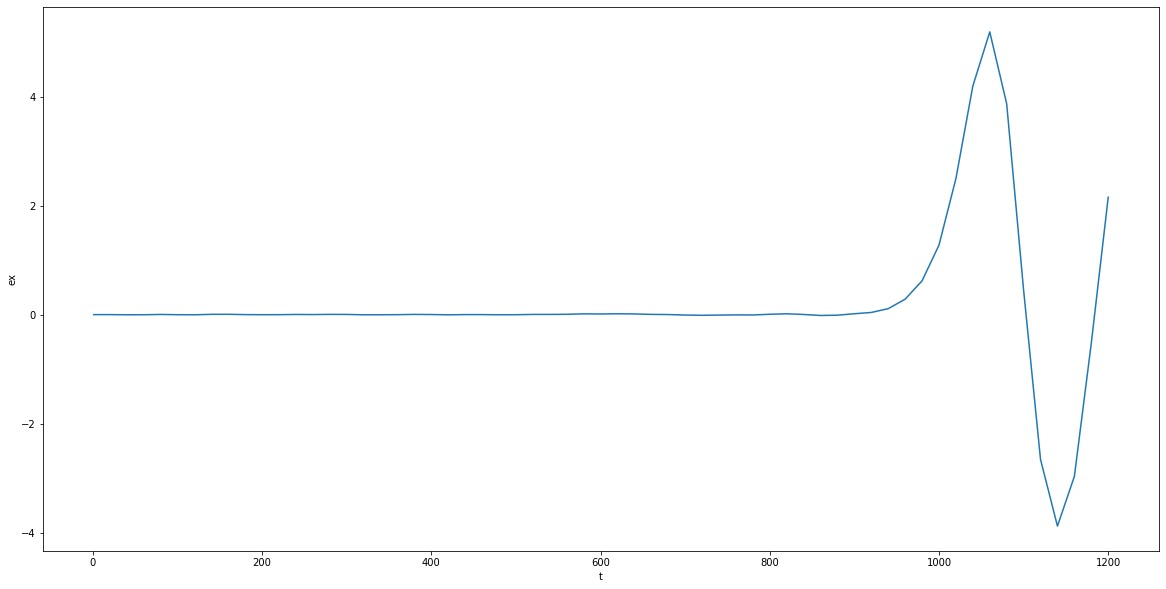

In [113]:
xxpltpoint = 20.0
xxindex =  af.find_nearest(dfields['ex_xx'], xxpltpoint)
pf.plot_field_time(all_fields, 'ex', xxindex = xxindex, yyindex = 0, zzindex = 0)

## Make stack plot

In [114]:
all_fields.keys()

dict_keys(['frame', 'dfields'])

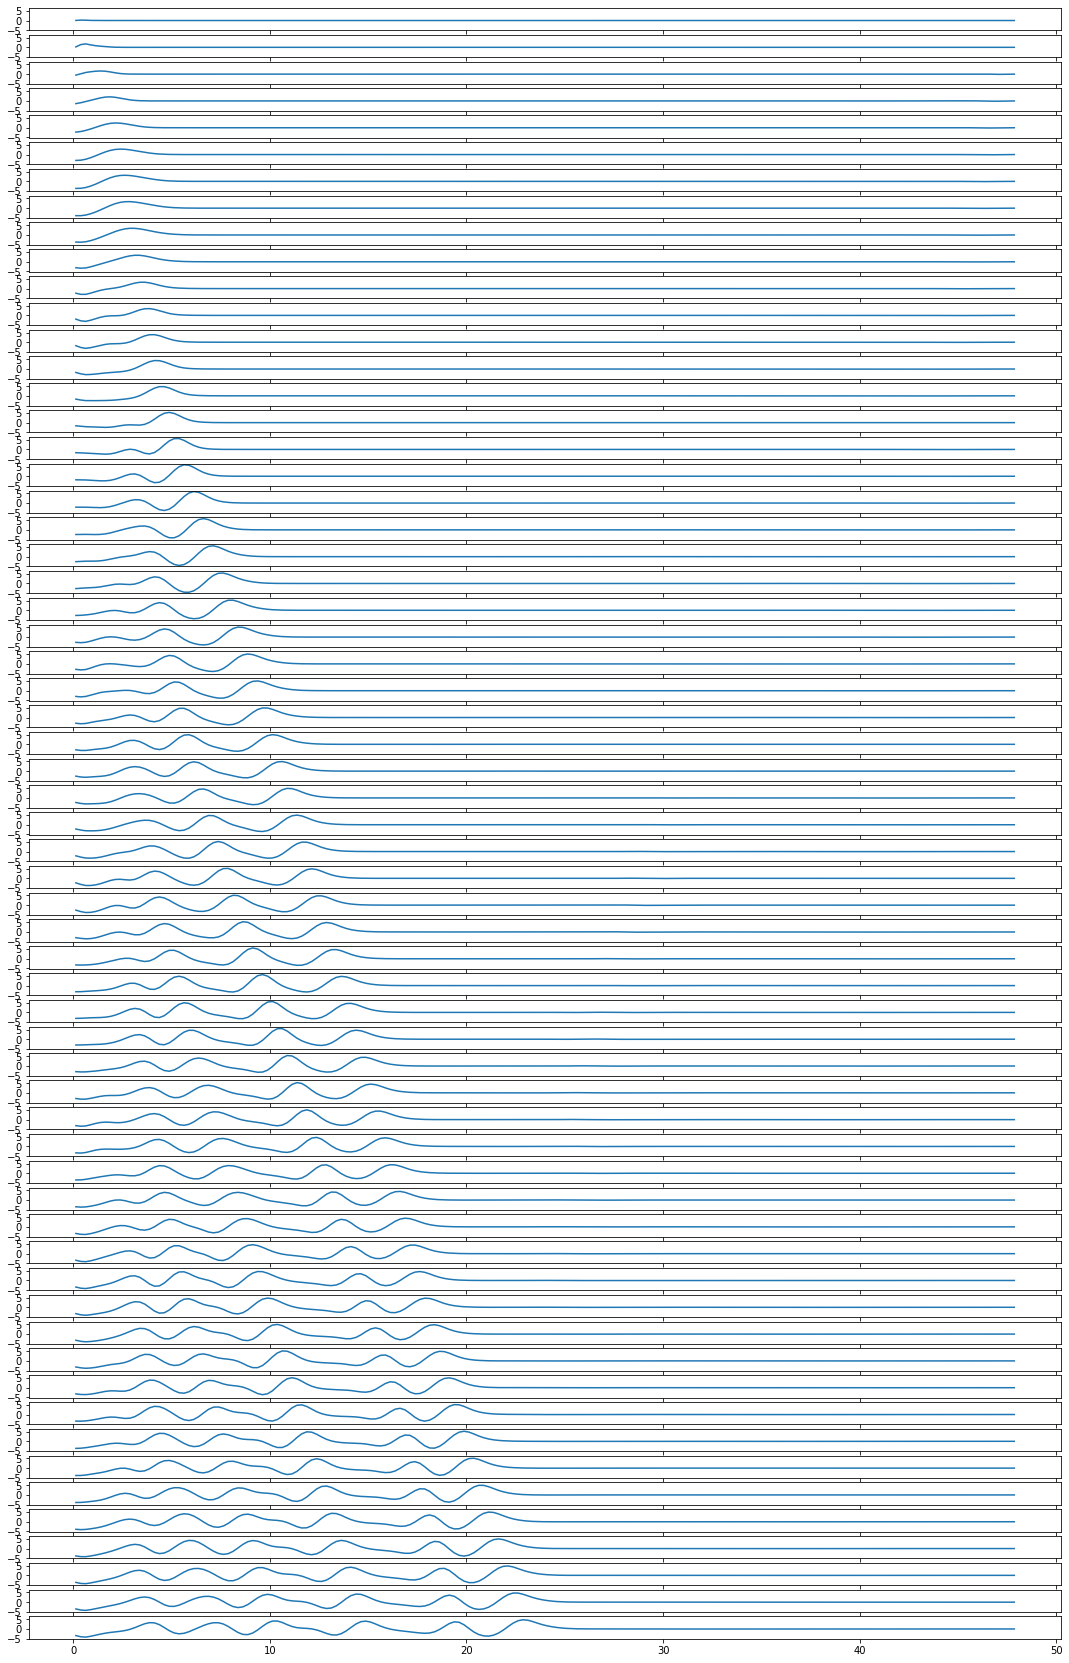

In [116]:
# fig = plt.figure()
# gs = fig.add_gridspec(3,1,hspace=0)
# axs = gs.subplots(sharex=True, sharey=True)
# fig.suptitle('Sharing both axes')
# axs[0].plot(x, y ** 2)
# axs[1].plot(x, 0.3 * y, 'o')
# axs[2].plot(x, y, '+')

# # Hide x labels and tick labels for all but bottom plot.
# for ax in axs:
#     ax.label_outer()

In [211]:
#block to reload modules. Call this block after editing libraries
import importlib
importlib.reload(lf)
importlib.reload(af)
importlib.reload(pf)
importlib.reload(svf)
importlib.reload(sanf)
importlib.reload(ftf)

<module 'lib.fieldtransformfunctions' from '/Users/collbrown/Documents/OneDrive - University of Iowa/Research/DHybridR/analysistools/dHybridRAnalysis/lib/fieldtransformfunctions.py'>

In [188]:
af.estimate_shock_pos(all_fields['dfields'][-1])

21.875

In [189]:
#get all shock crossings
xshockvals = []
for k in range(0,len(all_fields['dfields'])):
    xshockvals.append(af.estimate_shock_pos(all_fields['dfields'][k]))
xshockvals #note: doesn't work until shock forms

[46.125,
 47.875,
 0.375,
 0.625,
 1.125,
 1.375,
 1.375,
 1.625,
 1.625,
 1.875,
 1.875,
 2.375,
 2.875,
 3.125,
 3.375,
 3.875,
 4.375,
 4.875,
 5.375,
 5.625,
 6.125,
 6.625,
 7.125,
 7.625,
 7.875,
 8.375,
 8.875,
 9.125,
 9.625,
 10.125,
 10.375,
 10.875,
 11.125,
 11.625,
 11.875,
 12.375,
 12.625,
 13.125,
 13.375,
 13.875,
 14.125,
 14.625,
 14.875,
 15.125,
 15.625,
 15.875,
 16.375,
 16.625,
 16.875,
 17.375,
 17.875,
 18.125,
 18.625,
 18.875,
 19.375,
 19.875,
 20.375,
 20.625,
 21.125,
 21.625,
 21.875]

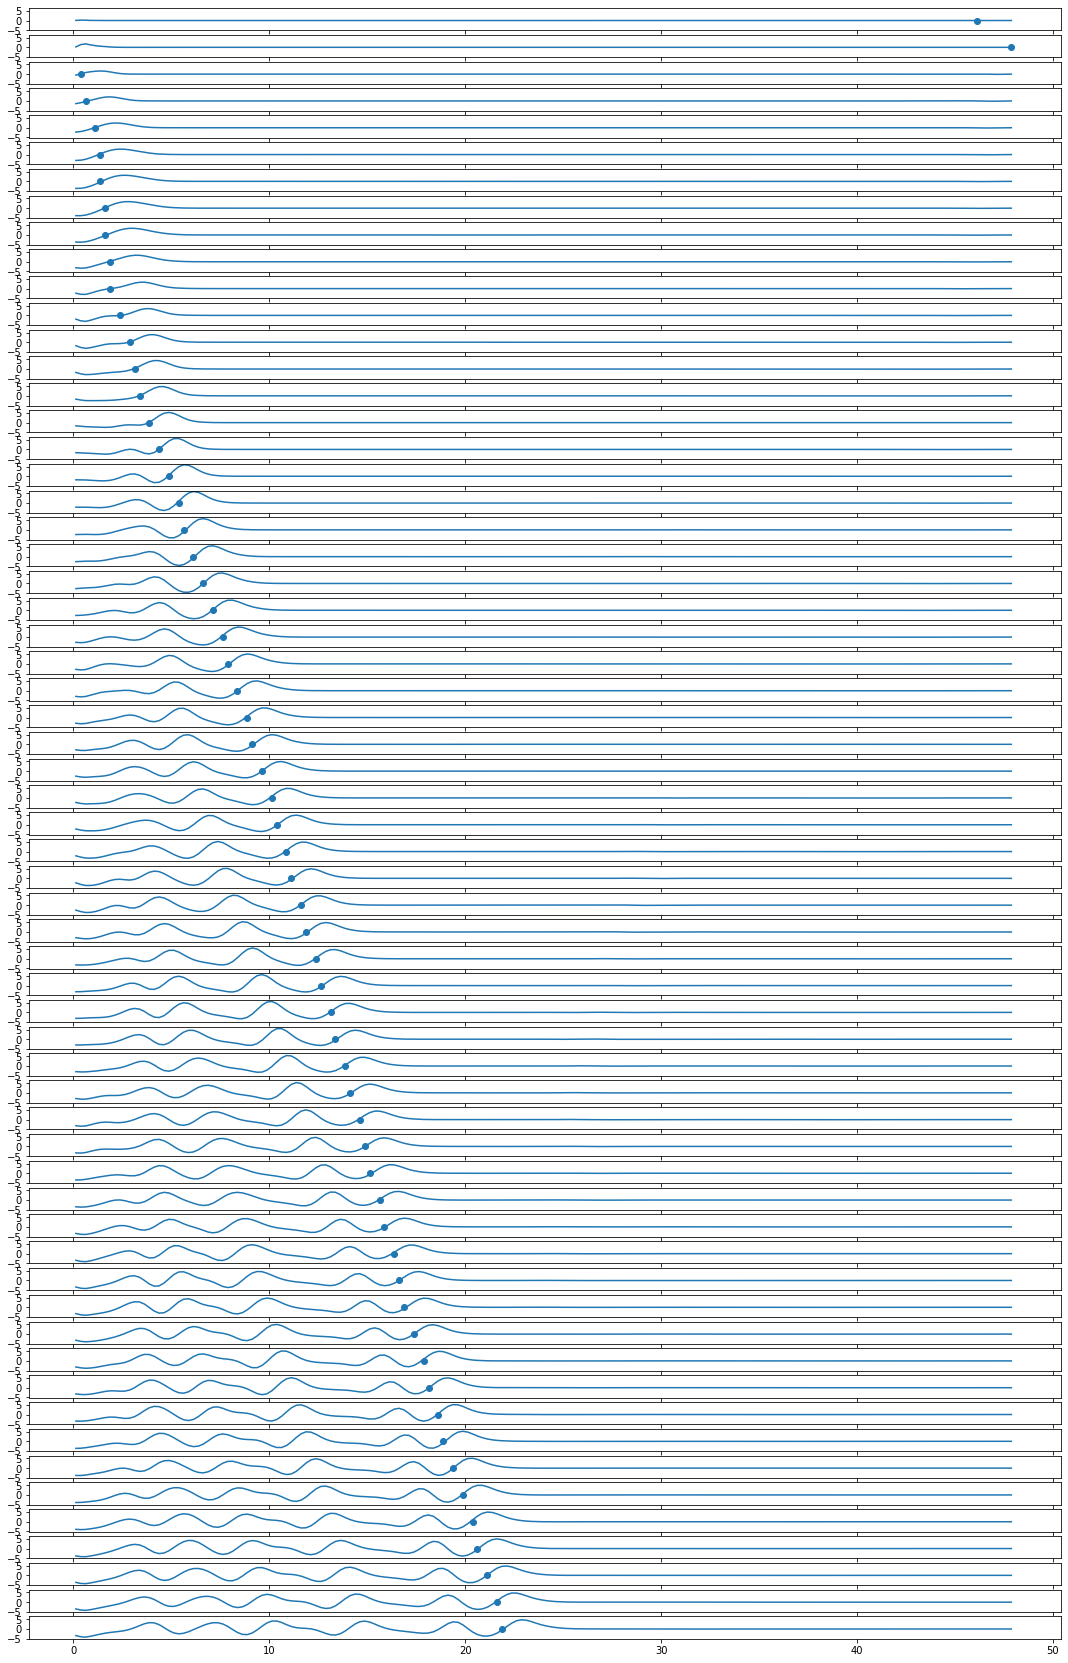

In [190]:
pf.stack_line_plot(all_fields,'ex',xshockvals = xshockvals)

In [203]:
#get shock velocity
#assume that the shock forms after half the simulation TODO: do something better
startidx = int(len(all_fields['frame'])/2)

xvals = xshockvals[startidx:]
framevals = all_fields['frame'][startidx:]

#convert frame to time
dt = 0.01 #TODO: automate loading this
tvals = []
for k in range(0, len(framevals)):
    tvals.append(framevals[k]*dt)

#fit to line
v, v0 = np.polyfit(tvals, xvals, 1)
v

1.8911290322580647

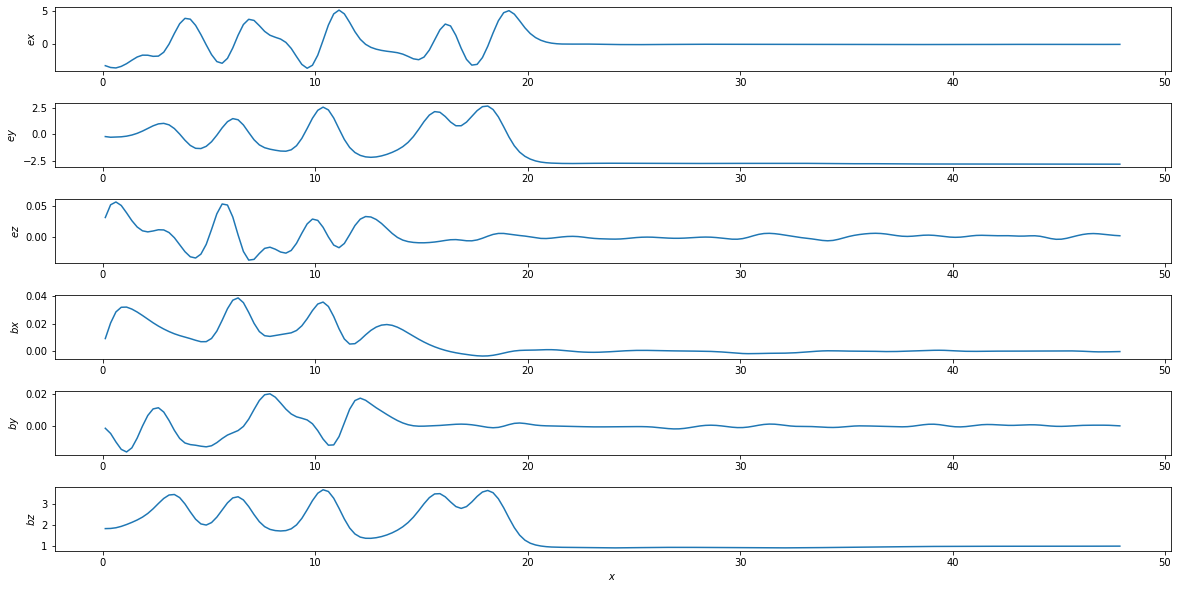

In [218]:
testidx = -10
pf.plot_all_fields(all_fields['dfields'][testidx], axis='_xx', xxindex = 0, yyindex = 0, zzindex = 0)

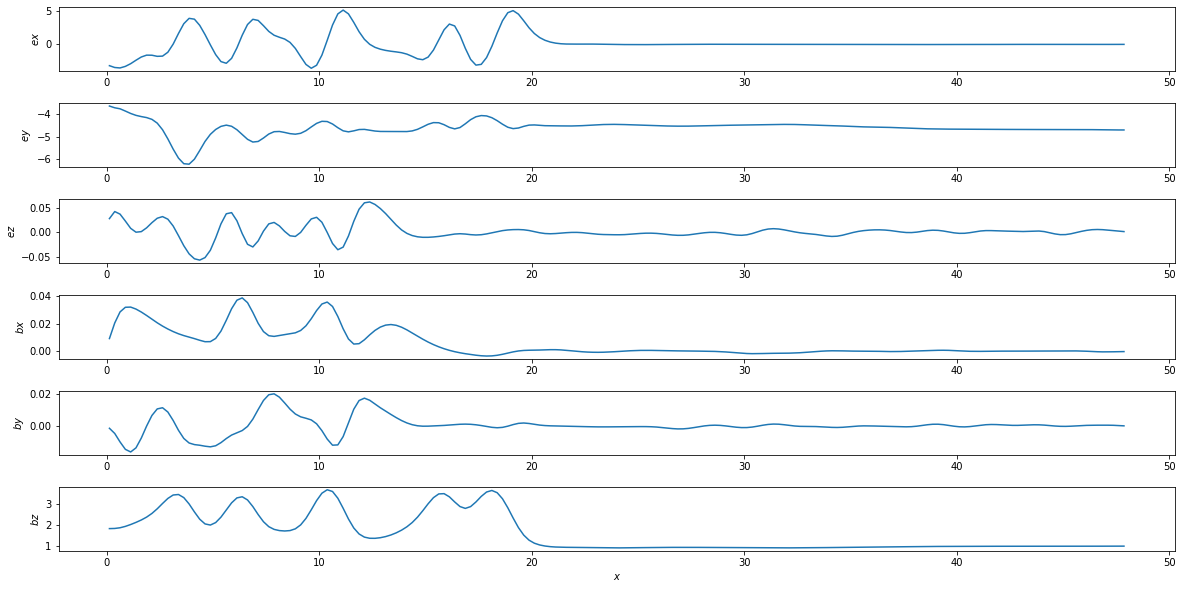

In [219]:
pf.plot_all_fields(ftf.lorentz_transform_vx(all_fields['dfields'][testidx],v), axis='_xx', xxindex = 0, yyindex = 0, zzindex = 0)